# Deep Neural Network (DNN)

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

Import OSNIR Dataset and shuffle data

In [41]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [42]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Deep Neural Network Model

1 input layer, 2 hidden layers (32 neurons each) and 1 output layer

In [43]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(6,), activation='relu'),  # first hidden layer
    keras.layers.Dense(32, activation='relu'),  # second hidden layer
    keras.layers.Dense(1) # output layer
])

Early hault of training if loss has not improved in 50 epochs in validation set

In [44]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=50)

Adam Optimizer, Mean Square Error Loss

In [45]:
model.compile(optimizer='adam', loss='mse')

Fit model, run for 500 epochs

In [46]:
model.fit(x_train,y_train,
          validation_data=(x_valid,y_valid),
          epochs=500,
          callbacks=[early_stop],
          batch_size=32,
          verbose=1
          )

Epoch 1/500
57/57 [==============================] - 1s 4ms/step - loss: 109.0048 - val_loss: 59.8282
Epoch 2/500
57/57 [==============================] - 0s 2ms/step - loss: 53.9614 - val_loss: 47.8275
Epoch 3/500
57/57 [==============================] - 0s 2ms/step - loss: 45.5424 - val_loss: 40.1666
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 39.0938 - val_loss: 36.9762
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 34.6688 - val_loss: 32.0796
Epoch 6/500
57/57 [==============================] - 0s 2ms/step - loss: 31.9392 - val_loss: 29.8197
Epoch 7/500
57/57 [==============================] - 0s 2ms/step - loss: 29.2052 - val_loss: 27.6943
Epoch 8/500
57/57 [==============================] - 0s 2ms/step - loss: 26.8852 - val_loss: 25.7309
Epoch 9/500
57/57 [==============================] - 0s 2ms/step - loss: 24.3041 - val_loss: 24.2902
Epoch 10/500
57/57 [==============================] - 0s 2ms/step - loss: 22.7260 - val_lo

In [47]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [48]:
OSNIR_est = (model.predict(Input_num))

94/94 [==============================] - 0s 1ms/step


In [49]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[43.0, 0.0, 10.0, 25.0, 0.0, 15.0] => 16.020964 (expected 16.093703)
[13.0, -2.0, 10.0, 50.0, 0.0, 9.0] => 27.809931 (expected 27.770533)
[38.0, 3.0, 100.0, 50.0, 0.0, 9.0] => 9.087513 (expected 9.256835)
[11.0, 3.0, 10.0, 25.0, 12.5, 9.0] => 19.902388 (expected 20.248483)
[40.0, 0.0, 100.0, 25.0, 0.0, 9.0] => 9.665529 (expected 9.698043)
[29.0, -6.0, 100.0, 25.0, 0.0, 9.0] => 8.541752 (expected 8.267358)
[5.0, -5.0, 100.0, 25.0, 0.0, 9.0] => 16.589874 (expected 16.562550)
[41.0, -1.0, 50.0, 25.0, 0.0, 3.0] => 15.232980 (expected 15.543447)
[33.0, 3.0, 100.0, 50.0, 0.0, 9.0] => 9.940998 (expected 9.936834)
[7.0, -1.0, 50.0, 12.5, 0.0, 9.0] => 18.976553 (expected 19.635027)


In [50]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [51]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_DNN.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00033344,
        0.        , 0.00033344, 0.00033344, 0.00133378, 0.00433478,
        0.00666889, 0.01567189, 0.04401467, 0.1813938 , 0.2720907 ,
        0.24974992, 0.1357119 , 0.05135045, 0.01733911, 0.00866956,
        0.00466822, 0.00200067, 0.00066689, 0.00100033, 0.        ,
        0.00033344, 0.00066689, 0.        , 0.00033344, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00033344]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

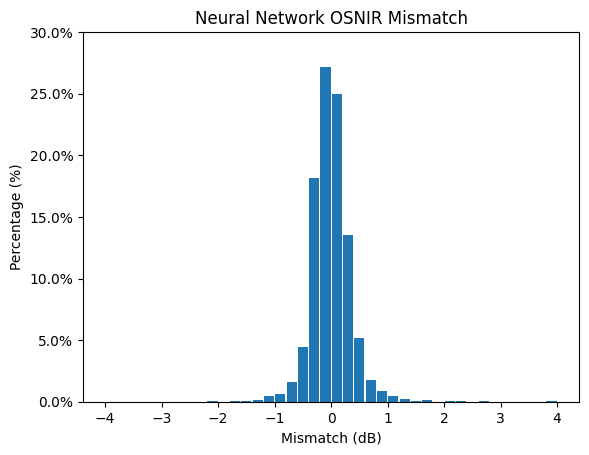

In [52]:
plt.title('Neural Network OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )